In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data.import_data import *
from src.data.make_dataset import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_index = 1
path_to_zip = '../data/raw/synthetic_basic.zip'
df = import_df_from_zip(path_to_zip, csv_index)

In [3]:
df.head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,year,month,day,hour,minute_of_hour,minute_of_day
2015-01-01 00:00:00-05:00,-1.0,0.0,5.1,0.0,-0.01436,1,2015,1,1,0,0,0
2015-01-01 00:01:00-05:00,-1.0,0.0,5.1,0.0,-0.01436,1,2015,1,1,0,1,1
2015-01-01 00:02:00-05:00,-1.0,0.0,5.1,0.0,-0.01436,1,2015,1,1,0,2,2
2015-01-01 00:03:00-05:00,-1.0,0.0,5.1,0.0,-0.01436,1,2015,1,1,0,3,3
2015-01-01 00:04:00-05:00,-1.0,0.0,5.1,0.0,-0.01436,1,2015,1,1,0,4,4


# Clipping functions

In [4]:
%%time
df1 = remove_clipping_with_universal_window(df,verbose=True)

Max power set as 1827.0
(213267, 12)
20.55555555555556% of the data has been removed!
CPU times: user 133 ms, sys: 173 ms, total: 305 ms
Wall time: 304 ms


In [5]:
%%time
df2 = remove_clipping_with_flexible_window(df,verbose=True)

Max power set as 1827.0
9.594818668613847% of the data has been removed!
CPU times: user 1.91 s, sys: 84.6 ms, total: 1.99 s
Wall time: 1.99 s


In [6]:
len(df), len(df1), len(df2)

(2629440, 2088944, 2377150)

# Downsampling function

In [7]:
dfs = []
dfs.append(downsample_dataframe(df))
dfs.append(downsample_dataframe(df, clip_method='universal', night_method='basic'))
dfs.append(downsample_dataframe(df, offset='H'))

(213267, 12)


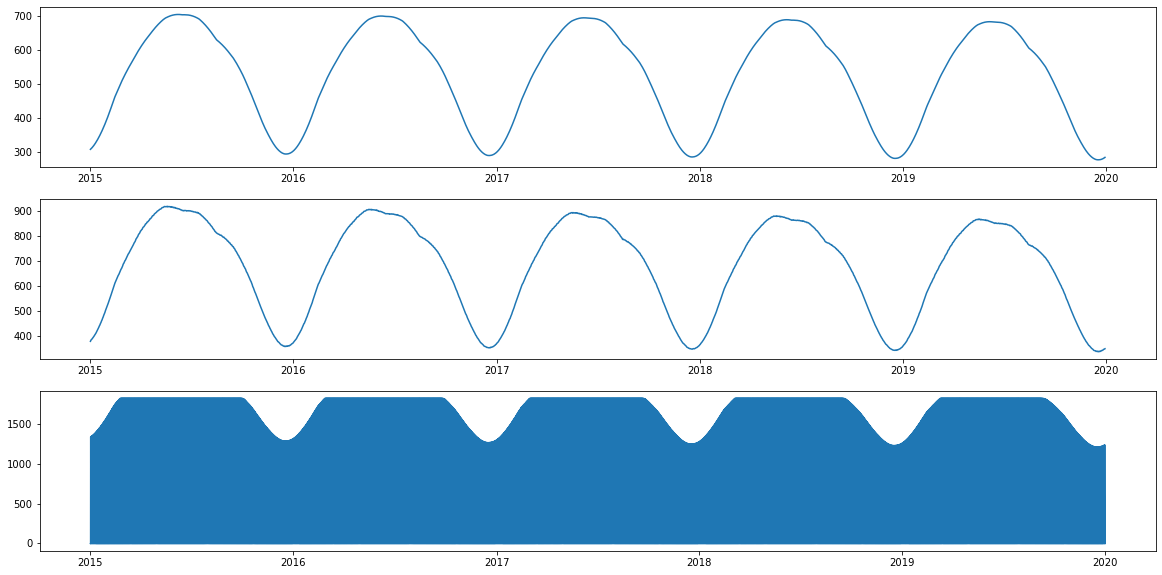

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(20,10))
for i in range(3):
    axs[i].plot(dfs[i].index, dfs[i].Power)